In [25]:
# BASELINE MODEL TRAINING
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
# Load cleaned dataset
df = pd.read_csv("/content/clean_email_dataset.csv")

In [27]:
# Recreate TF-IDF features
tfidf = TfidfVectorizer(max_features=10000)  # Use same params as during cleaning
X = tfidf.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [28]:
# Initialize and train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      3182
        spam       0.98      0.99      0.98      2917

    accuracy                           0.99      6099
   macro avg       0.98      0.99      0.99      6099
weighted avg       0.99      0.99      0.99      6099



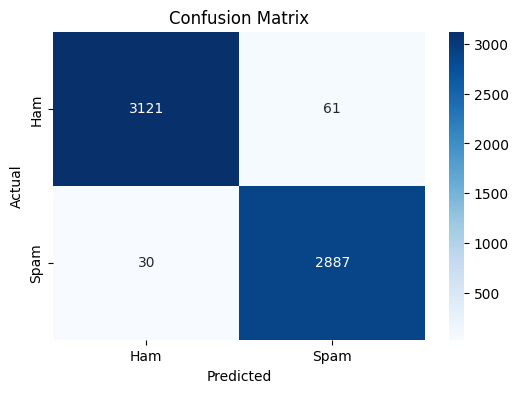

Accuracy: 0.99


In [29]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d",
            cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

In [30]:
# Get top 20 spam/ham indicators
feature_names = tfidf.get_feature_names_out()
ham_coefs = nb_model.feature_log_prob_[0]
spam_coefs = nb_model.feature_log_prob_[1]

top_ham_words = [feature_names[i] for i in ham_coefs.argsort()[-20:][::-1]]
top_spam_words = [feature_names[i] for i in spam_coefs.argsort()[-20:][::-1]]

print("Top Ham Indicators:", top_ham_words)
print("Top Spam Indicators:", top_spam_words)

Top Ham Indicators: ['the', 'to', 'enron', 'and', 'ect', 'of', 'for', 'you', 'in', 'on', 'is', 'subject', 'this', 'will', 'that', 'we', 'be', 'have', 'hou', 'with']
Top Spam Indicators: ['the', 'to', 'and', 'you', 'of', 'your', 'in', 'is', 'for', 'this', 'subject', 'http', 'we', 'our', 'com', 'here', 'it', 'with', 'no', 'that']
